### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [123]:
data = pd.read_csv('data/coupons.csv')

In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

    Column                    NaN   Dtype
    car                     12576   object 
    Bar                       107   object
    CoffeeHouse               217   object
    CarryAway                 151   object
    RestaurantLessThan20      130   object
    Restaurant20To50          189   object

In [125]:
df = data.isnull().sum()
df

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [170]:
# set NaN to 0
data.fillna(0, inplace=True)
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


4. What proportion of the total observations chose to accept the coupon? 



In [127]:
denom = len(data)
numer = len(data[data['Y'] == 1])

accepted_proportion = numer / denom
print(f'\nProportion of customers that accepted the coupon: {accepted_proportion:.3f}')


Proportion of customers that accepted the coupon: 0.568


5. Use a bar plot to visualize the `coupon` column.

In [128]:
coupon_counts = data['coupon'].value_counts().reset_index()
coupon_counts.columns = ['Coupon', 'Count']

fig = px.bar(coupon_counts, x='Coupon', y='Count', title='Coupon Count')
fig.update_layout(
    xaxis=dict(showgrid=True, gridwidth=0.5, gridcolor='gray'),
    yaxis=dict(showgrid=True, gridwidth=0.5, gridcolor='lightgray'))
fig.update_traces(marker_line_color='black', marker_line_width=1)
fig.show()

6. Use a histogram to visualize the temperature column.

In [130]:
fig = px.histogram(data, x=data['temperature'])
fig.update_layout(
    xaxis=dict(showgrid=True, gridwidth=0.5, gridcolor='gray'),
    yaxis=dict(showgrid=True, gridwidth=0.5, gridcolor='lightgray'))
fig.update_traces(marker_line_color='black', marker_line_width=1)
fig.update_xaxes(title_text="Temperature in Fahrenheit", range=(10,100))
fig.update_yaxes(title_text="Frequency")

fig.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [131]:
bar_coupons = data[data['coupon'] == 'Bar']
bar_coupons

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,0,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [132]:
bar_coupons_accepted = bar_coupons.shape[0] / data['coupon'].shape[0]

print(f'\nProportion of bar coupons accepted: {bar_coupons_accepted:.3f}\n')


Proportion of bar coupons accepted: 0.159



3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [133]:
lower_bound_visits = 570 + 397
upper_bound_visits = 150 + 49

print(f'\nAcceptance rate of those who went to a bar 3 or fewer times: {lower_bound_visits}')
print(f'Acceptance rate of those who went to a bar 4 or more times:  {upper_bound_visits}\n')


Acceptance rate of those who went to a bar 3 or fewer times: 967
Acceptance rate of those who went to a bar 4 or more times:  199



4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [134]:
under_25 = bar_coupons[bar_coupons['age'] == '21'] # exclude those who are not of legal drinking age
over_25 = bar_coupons[~bar_coupons['age'].str.contains('21', case=False)] 
frequents = ['1~3', '4~8', 'gt8']

over_25_frequents = over_25[over_25['Bar'].isin(frequents)] 
total = 1513 + over_25_frequents.shape[0]

print(f'\nThe drivers who go to a bar more than once a month and are over the age of 25:  {over_25_frequents.shape[0]}')
print(f'All other drivers of legal drinking age:                                        {total}\n')


The drivers who go to a bar more than once a month and are over the age of 25:  420
All other drivers of legal drinking age:                                        1933



## Difference
The drivers who are over 25 years old that go to the bar more than once a month make about 20% of the population.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [137]:
# rename passenger column
bar_coupons.rename(columns={'passanger': 'passenger'}, inplace=True)

# create dataframe with only drivers who visit bars more than once
driver_visits_bar_more_than_once = bar_coupons[bar_coupons['Bar'].isin(frequents)]

# list to exclude kids and farming, fishing, and forestry occupation
exclude = ['Kid(s)', 'Production Occupations']

# use previous dataset to exclude kid passengers
no_kids = driver_visits_bar_more_than_once[~driver_visits_bar_more_than_once['passenger'].isin(exclude)]

# exclude farming, fishing, and forestry jobs
no_prod_jobs = no_kids[~no_kids['occupation'].isin(exclude)]
no_prod_jobs

/var/folders/w1/62zhz1w55f758h0znl5l9y880000gn/T/ipykernel_89460/2460878479.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
90,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,0,1,1
101,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,1,0,1
105,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,1,1,0,1,0
112,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,0,1,1
123,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12500,Work,Alone,Snowy,30,7AM,Bar,1d,Female,26,Unmarried partner,...,never,4~8,4~8,less1,1,1,1,0,1,0
12525,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,1,0,0,1,1
12526,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,1,0,0,1,1
12529,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,1,0,0,1,0


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [138]:
no_kids_yes_coupon = no_kids[no_kids['Y'] > 0]
no_kids_yes_coupon

print(f'\nThe drivers who go to a bar more than once a month and are over the age of 25:                      {over_25_frequents.shape[0]}')
print(f'The drivers who go to a bar more than once a month and had no kid passengers and were not widowed:  {no_kids_yes_coupon.shape[0]}\n')


The drivers who go to a bar more than once a month and are over the age of 25:                      420
The drivers who go to a bar more than once a month and had no kid passengers and were not widowed:  393



### Acceptance Rates Between Drivers
When comparing the drivers who got to a bar more than once and over 25 with other drivers that went more than once and were not widowed and did not have a kid passenger, they frequency was pretty close. The difference in drivers who were over 25 years and the no kids not divorced were only 27 people.

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Hypothesis
The coupon didn't really matter. It looked like the driver would have still went to the bar regardless of the coupon.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

# Overview
I'm going to separate the population into drivers who accepted the coupon vs those who declined the coupon. I want to see what characteristics makes a driver accept a coupon. I will create a model driver that will likely accept a coupon.

## Table of Contents
- [Separate Data By Accepted / Declined](#intro)
- [Look For Correlation](#correlation)
- [Look At Strongest Attributes Of Accepted Coupons](#attributes)
- [Chart Findings](#charts)
- [Summary](#summary)

## Separate Data By Accepted / Declined {#intro}

In [139]:
yes = data[data['Y'] > 0]
no = data[data['Y'] < 1]
accepted_coupon = yes.shape[0]
declined_coupon = no.shape[0]

## Look For Correlation {#correlation}

Look at any columns that have a strong correlation. This will help validate assumptions and make patterns visible.

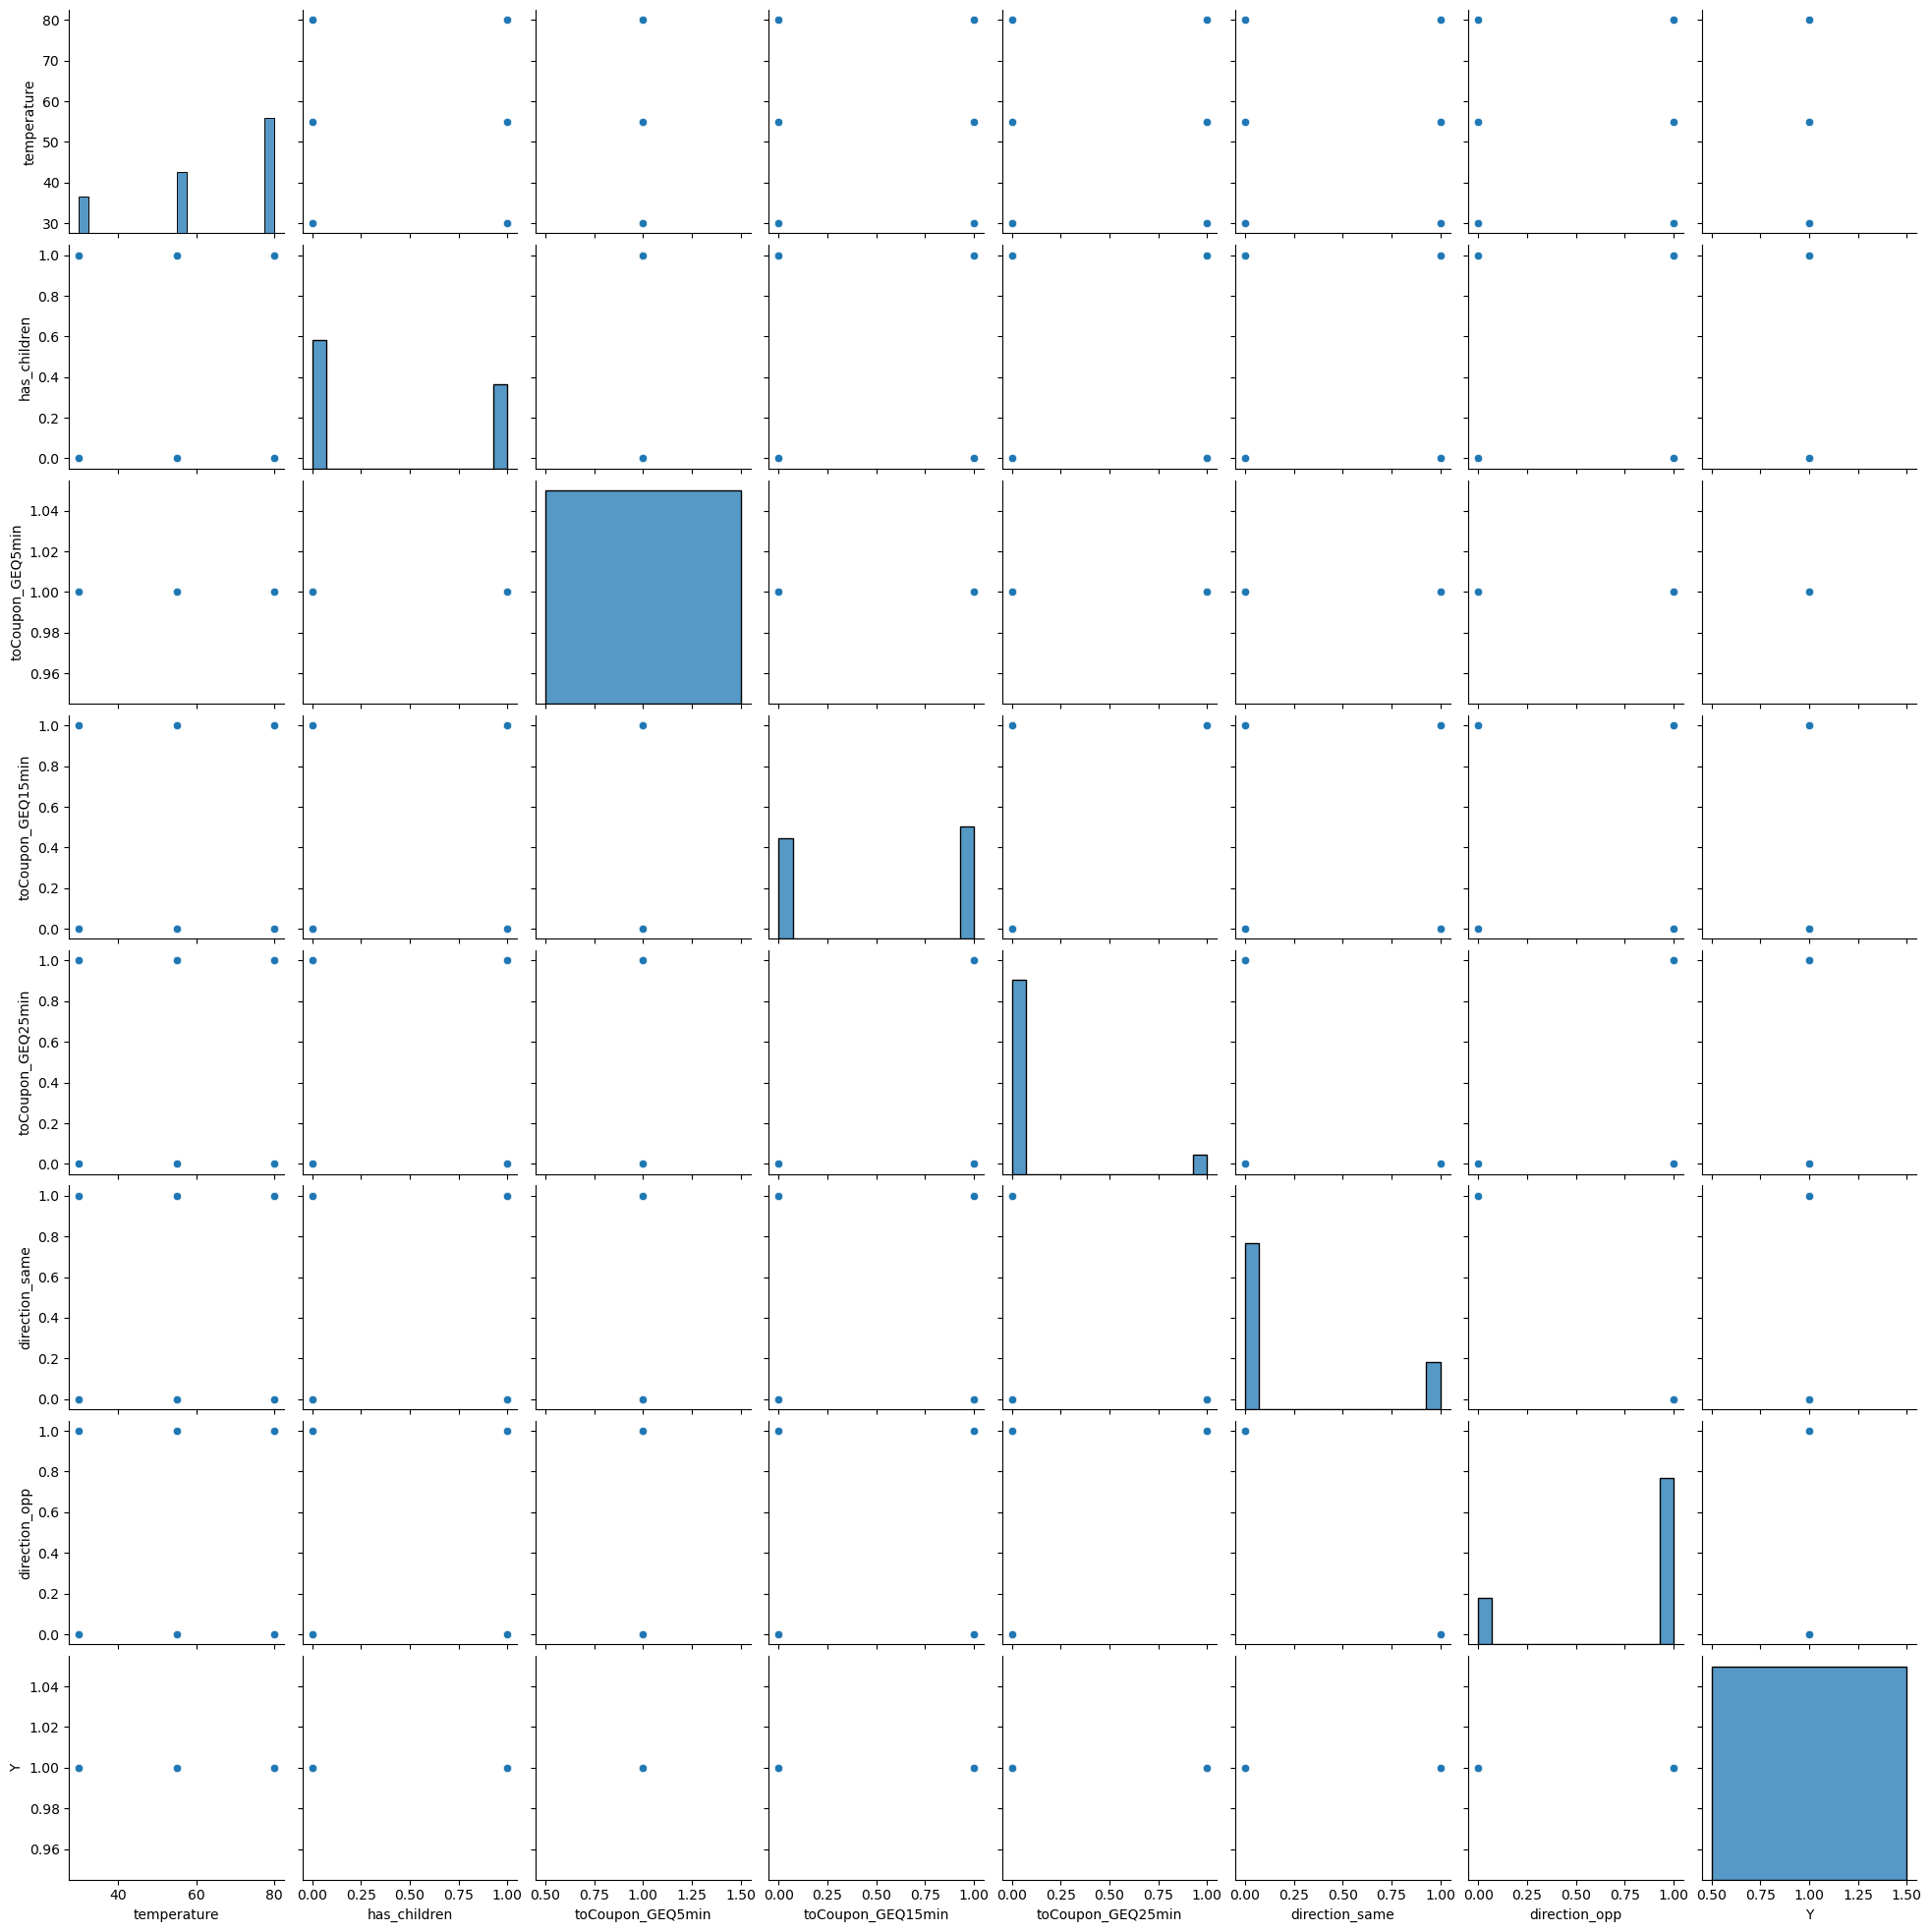

In [140]:
yes.select_dtypes(include='number').corr()

sns.pairplot(yes)
plt.show()

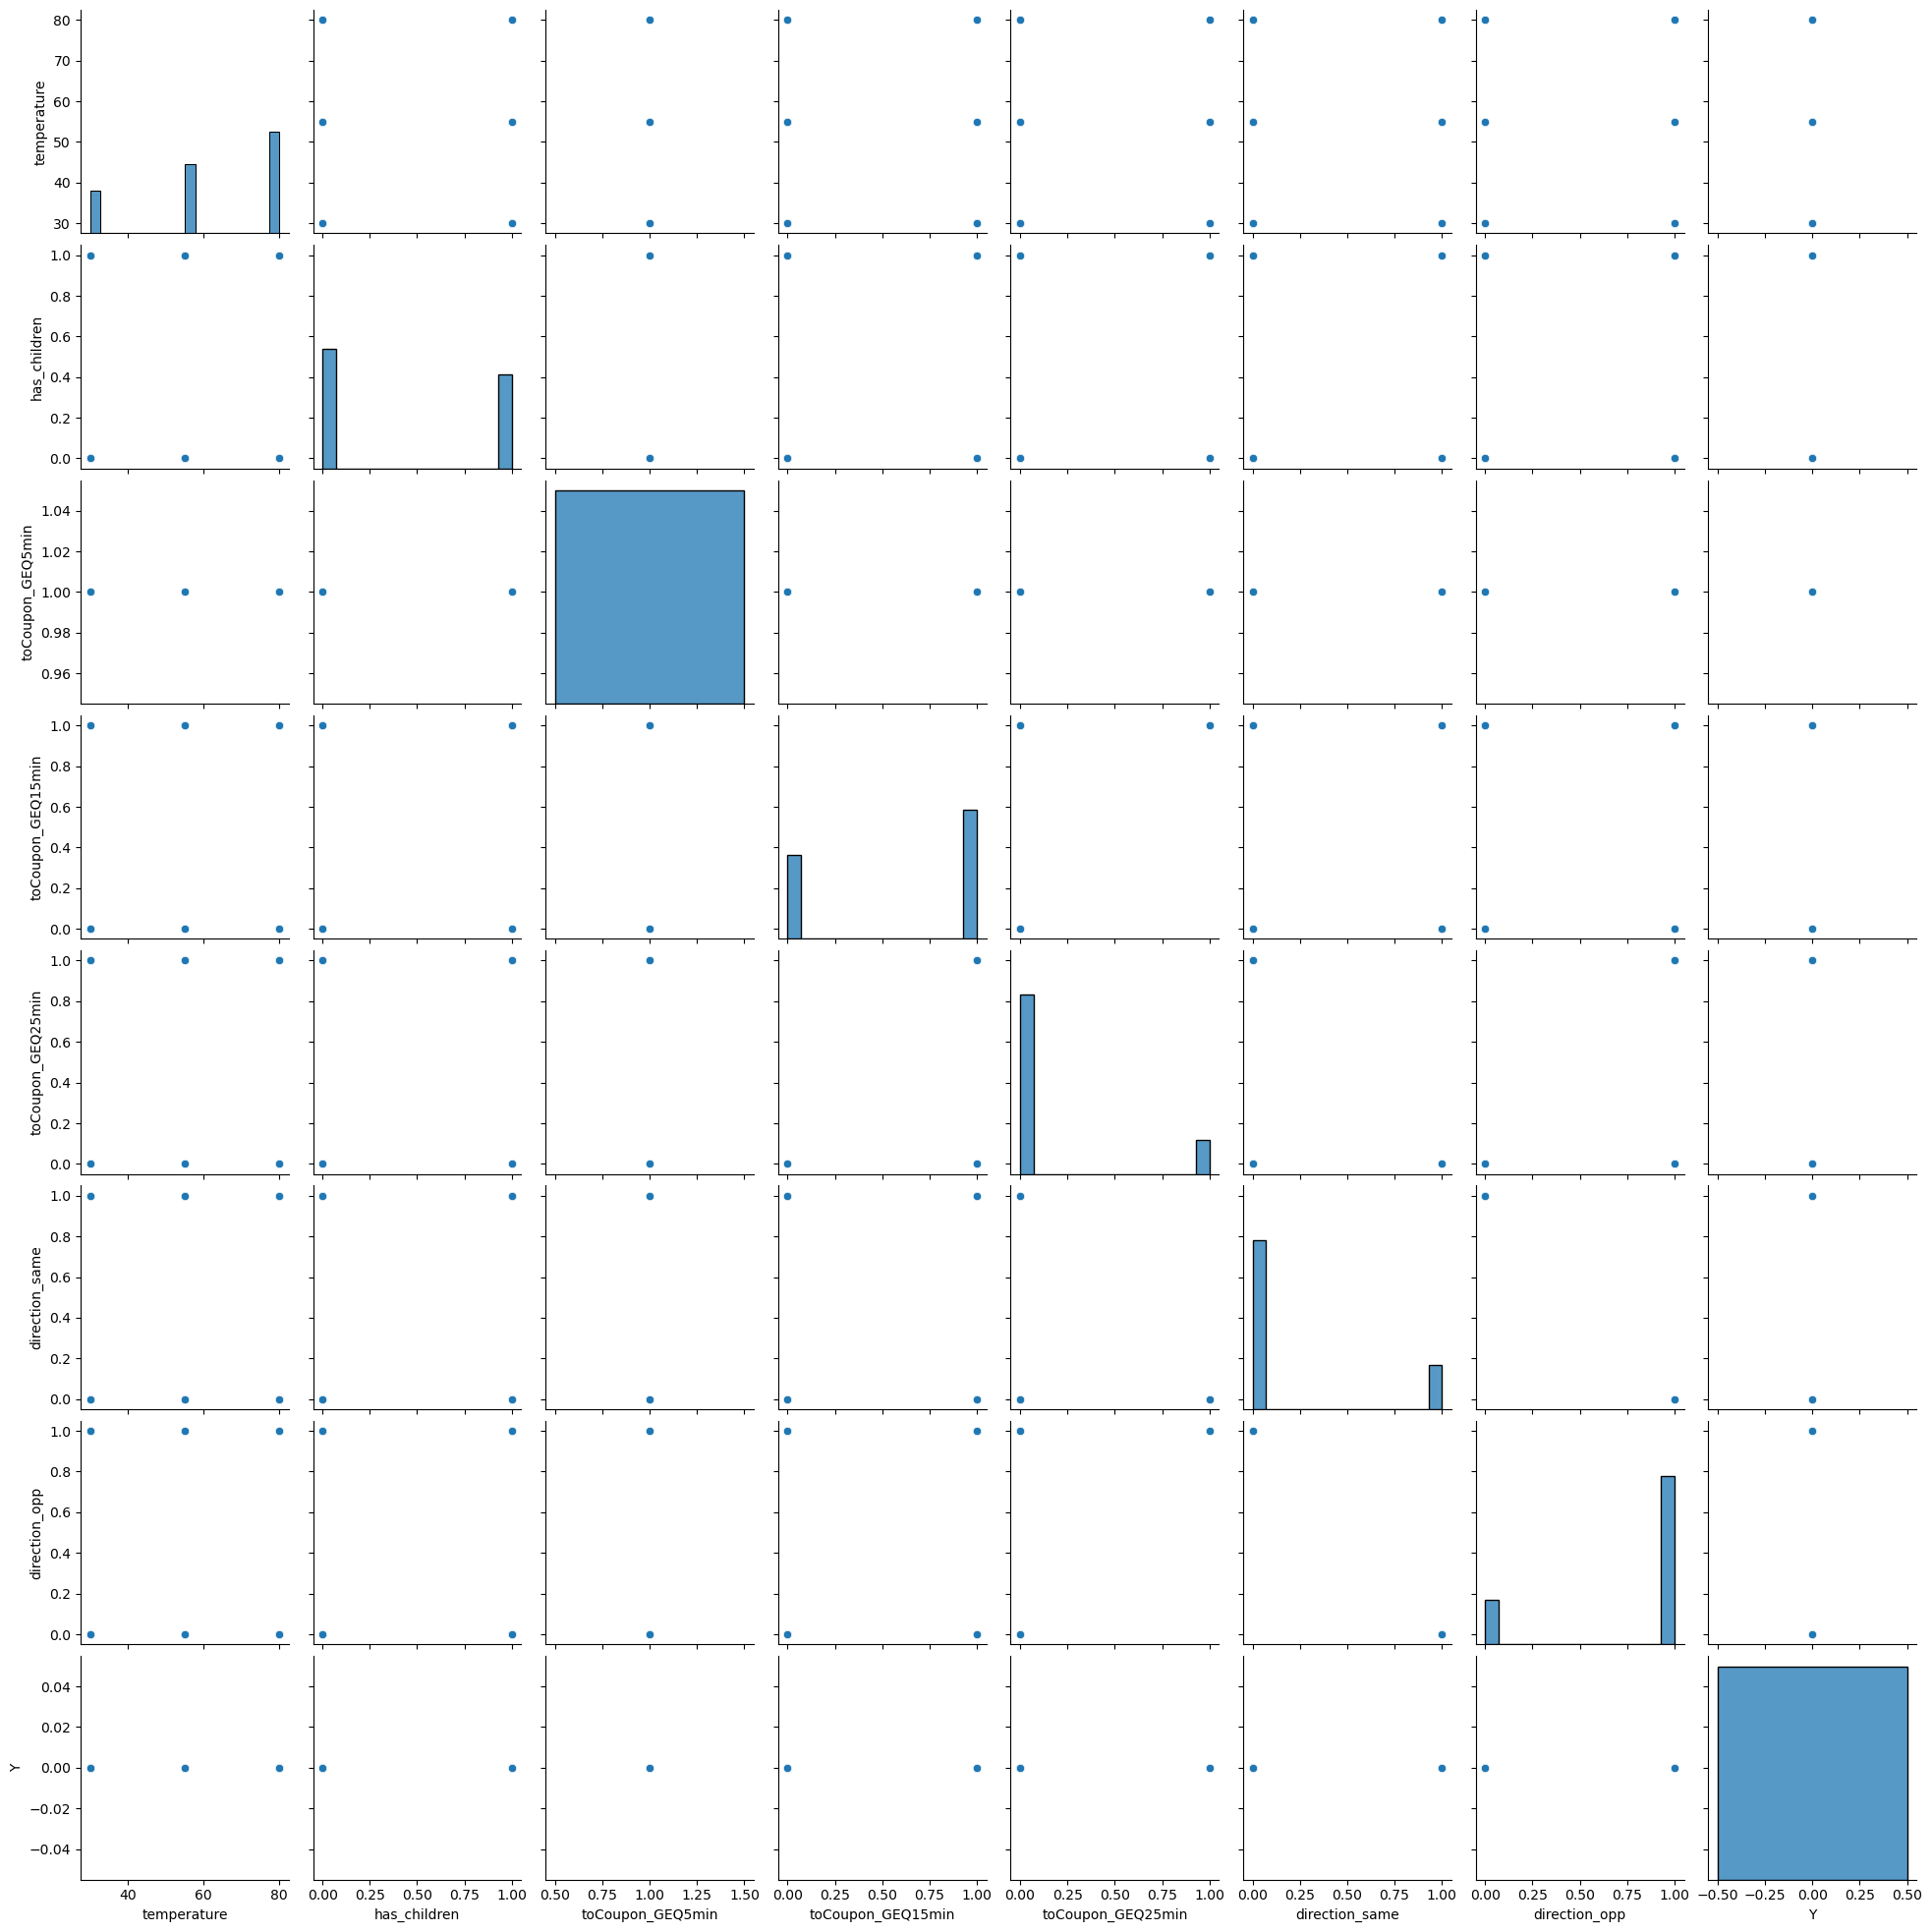

In [141]:
no.select_dtypes(include='number').corr()
sns.pairplot(no)

plt.show()

## Look At Strongest Attributes Of Accepted Coupons {#attributes}

In [143]:
yes['gender'].value_counts()

Male      3647
Female    3563
Name: gender, dtype: int64

In [144]:
no['gender'].value_counts()

Female    2948
Male      2526
Name: gender, dtype: int64

In [145]:
yes['coupon'].value_counts()

Coffee House             1995
Restaurant(<20)          1970
Carry out & Take away    1760
Bar                       827
Restaurant(20-50)         658
Name: coupon, dtype: int64

In [146]:
no['coupon'].value_counts()

Coffee House             2001
Bar                      1190
Restaurant(20-50)         834
Restaurant(<20)           816
Carry out & Take away     633
Name: coupon, dtype: int64

In [147]:
yes['destination'].value_counts()

No Urgent Place    3982
Home               1639
Work               1589
Name: destination, dtype: int64

In [148]:
no['destination'].value_counts()

No Urgent Place    2301
Home               1598
Work               1575
Name: destination, dtype: int64

In [149]:
yes['weather'].value_counts()

Sunny    5989
Snowy     661
Rainy     560
Name: weather, dtype: int64

In [150]:
no['weather'].value_counts()

Sunny    4080
Snowy     744
Rainy     650
Name: weather, dtype: int64

In [151]:
yes['direction_same'].value_counts()

0    5624
1    1586
Name: direction_same, dtype: int64

In [152]:
no['direction_same'].value_counts()

0    4336
1    1138
Name: direction_same, dtype: int64

In [153]:
yes['direction_opp'].value_counts()

1    5624
0    1586
Name: direction_opp, dtype: int64

In [154]:
no['direction_opp'].value_counts()

1    4336
0    1138
Name: direction_opp, dtype: int64

In [155]:
yes['income'].value_counts()

$25000 - $37499     1194
$12500 - $24999     1052
$37500 - $49999     1018
$100000 or More     1004
$50000 - $62499      988
Less than $12500     618
$87500 - $99999      476
$62500 - $74999      446
$75000 - $87499      414
Name: income, dtype: int64

In [156]:
no['income'].value_counts()

$25000 - $37499     819
$37500 - $49999     787
$12500 - $24999     779
$100000 or More     732
$50000 - $62499     671
$75000 - $87499     443
Less than $12500    424
$87500 - $99999     419
$62500 - $74999     400
Name: income, dtype: int64

In [157]:
yes['age'].value_counts()

21         1587
26         1525
31         1114
50plus      910
36          706
41          626
46          395
below21     347
Name: age, dtype: int64

In [158]:
no['age'].value_counts()

21         1066
26         1034
31          925
50plus      878
36          613
41          467
46          291
below21     200
Name: age, dtype: int64

In [159]:
yes['has_children'].value_counts()

0    4365
1    2845
Name: has_children, dtype: int64

In [160]:
no['has_children'].value_counts()

0    3066
1    2408
Name: has_children, dtype: int64

In [161]:
yes['time'].value_counts()

6PM     1888
7AM     1589
10AM    1384
2PM     1329
10PM    1020
Name: time, dtype: int64

In [162]:
no['time'].value_counts()

7AM     1575
6PM     1342
10PM     986
10AM     891
2PM      680
Name: time, dtype: int64

In [163]:
yes['expiration'].value_counts()

1d    4436
2h    2774
Name: expiration, dtype: int64

In [164]:
no['expiration'].value_counts()

2h    2819
1d    2655
Name: expiration, dtype: int64

## Chart Findings {#charts}

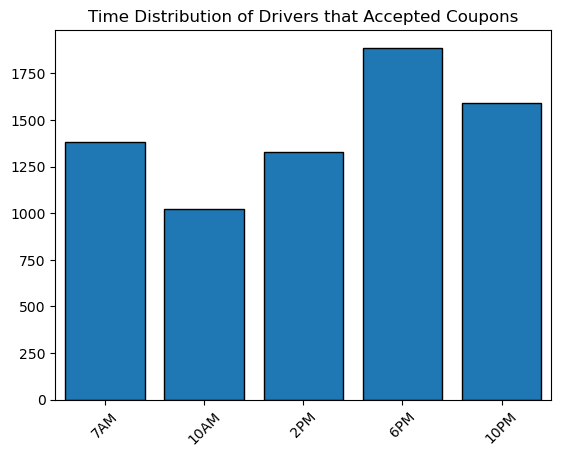

In [165]:
time = yes.groupby('time')['Y'].sum().reset_index()
time.sort_values('time')

# manually set chronological order
order = ['7AM', '10AM', '2PM', '6PM', '10PM']
time['time'].value_counts().reindex(order).plot.bar(rot=45, alpha=0.75)

plt.bar(time['time'], time['Y'], edgecolor='black')
plt.title('Time Distribution of Drivers that Accepted Coupons')
plt.show()

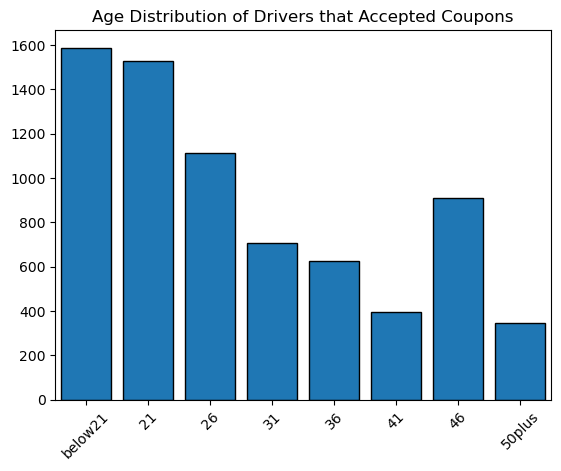

In [166]:
age = yes.groupby('age')['Y'].sum().reset_index()

# arrange age by ascending order
order = ['below21', '21', '26', '31', '36', '41', '46', '50plus']
age['age'].value_counts().reindex(order).plot.bar(rot=45, alpha=0.75)

plt.bar(age['age'], age['Y'], edgecolor='black')
plt.title('Age Distribution of Drivers that Accepted Coupons')
plt.show()

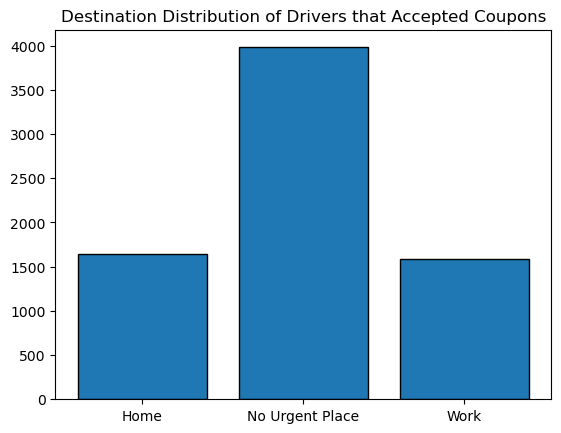

In [167]:
destination = yes.groupby('destination')['Y'].sum().reset_index()

plt.bar(destination['destination'], destination['Y'], edgecolor='black')
plt.title('Destination Distribution of Drivers that Accepted Coupons')
plt.show()

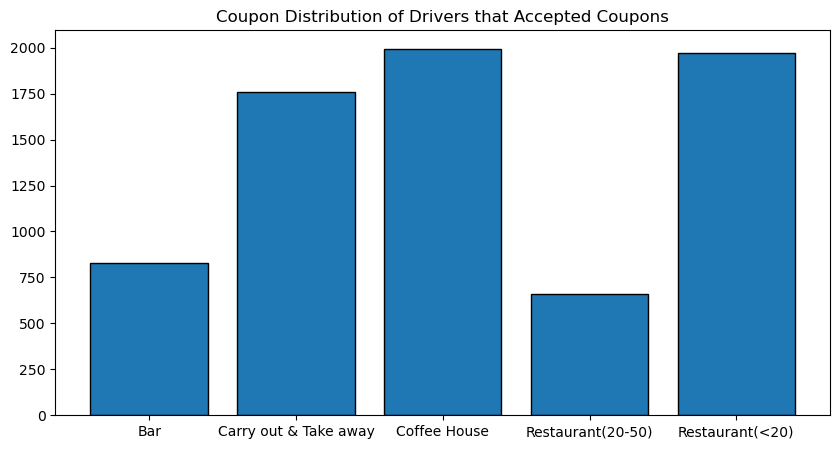

In [168]:
coupon = yes.groupby('coupon')['Y'].sum().reset_index()
plt.figure(figsize=(10,5))
plt.bar(coupon['coupon'], coupon['Y'], edgecolor='black')

plt.title('Coupon Distribution of Drivers that Accepted Coupons')
plt.show()

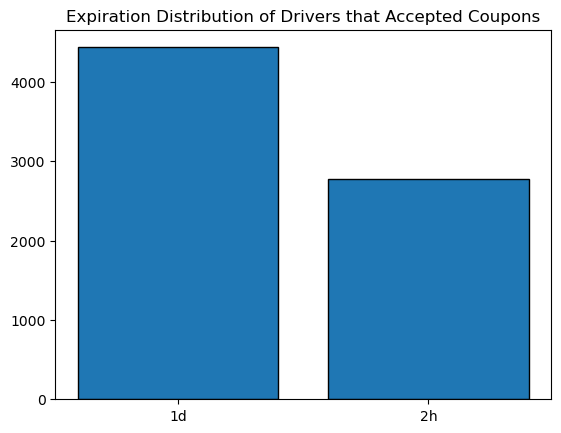

In [169]:
expiration = yes.groupby('expiration')['Y'].sum().reset_index()

plt.bar(expiration['expiration'], expiration['Y'], edgecolor='black')
plt.title('Expiration Distribution of Drivers that Accepted Coupons')
plt.show()

## Summary {#summary}
Upon analyzing the data of individuals who accepted coupons, it became evident that five specific columns played a significant role in influencing a driver's decision to accept a coupon. The data revealed a predominant trend among young, working-class individuals. Notably, the most critical factor was the destination. In cases where drivers did not have any urgent destination, they comprised 31% of those who accepted coupons. Additionally, the destination appeared to be closely related to the time of day. The post-work hours of 6 pm and 10 pm emerged as the two peak times when drivers were most likely to accept coupons. Furthermore, the age distribution exhibited a pronounced skew towards the younger demographic.

The most frequently redeemed coupons were associated with establishments serving food, such as coffee houses and local dine-in or carry-out restaurants. Moreover, the expiration date of the coupon played a significant role, as coupons with longer validity periods were more likely to be claimed.

## Recommendations
Based on this information, it is reasonable to conclude that <mark>coupons are more likely to be accepted by young, working individuals who are seeking food options after work, especially when the coupon is set to expire within a day.